In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [2]:
import pandas as pd
from src.agent.train import save_dir
from matplotlib import pyplot as plt
import seaborn as sns
# sns.set(style='whitegrid')

/home/osmany/anaconda3/envs/deep-rl-ca/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/osmany/anaconda3/envs/deep-rl-ca/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/osmany/anaconda3/envs/deep-rl-ca/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/osmany/anaconda3/envs/deep-r

In [ ]:
int_behavior_dirs = {
    'None': 'int_behaviorno_act_encounter_s0',
    'Random': 'int_behaviorrandom_act_encounter_s0',
    'Single': 'int_behaviorsingle_act_encounter_s0',
    'Sticky': 'int_behaviorsticky_act_encounter_s0'
}
pnmac_dirs = {
    .05: 'pnmac_exp_0.05_s0',
    .1: 'pnmac_exp_0.1_s0',
    .15: 'pnmac_exp_0.15_s0',
    .25: 'pnmac_exp_0.25_s0',
    .5: 'pnmac_exp_0.5_s0'
}
rw_shape_dirs = {
    1e-2: 'rw_shaping_exp0.01_s0',
    3e-3: 'rw_shaping_exp0.003_s0',
    1e-3: 'rw_shaping_exp0.001_s0',
    3e-4: 'rw_shaping_exp0.0003_s0',
    1e-4: 'rw_shaping_exp0.0001_s0'
}

In [ ]:
default_metrics.sum() / default_metrics.count()

In [ ]:
metrics = pd.read_csv(save_dir 
            / int_behavior_dirs[3] 
            / 'validation' 
            / 'metrics_n5000_s44.csv')
metrics.head()

In [ ]:
metrics.sum() / metrics.count()

## Results

We want to compare performance between intruder behaviors, pnmacs, and reward shapings.

Compare by: 
1. NMAC rate
2. Alert rate
3. Reversal rate

In [ ]:
base_metrics = pd.read_csv(save_dir / 'metrics_n5000_s44.csv')
base_metrics.head()

In [ ]:
int_behavior_dirs['No Maneuvers']

In [ ]:
pd.read_csv(save_dir 
            / int_behavior_dirs['No Maneuvers']
            / 'validation' 
            / 'metrics_n5000_s44.csv')

In [ ]:
def summarize_results(exp_dirs):
    summary_dict = {}
    control = pd.read_csv(save_dir
                / 'metrics_n5000_s44.csv')
    control = control.sum() / control.count()
    summary_dict['Control'] = control
    
    for name, dirname in exp_dirs.items():
        summ = pd.read_csv(save_dir 
                / dirname
                / 'validation' 
                / 'metrics_n5000_s44.csv')
        summ = summ.sum() / summ.count()
        summary_dict[name] = summ
    
    return summary_dict

In [ ]:
res = summarize_results(int_behavior_dirs)

In [ ]:
xs = list(res.keys())
ys = [res[x].nmac for x in xs]

sns.barplot(x=xs, y=ys)
plt.xlabel('Intruder Behavior')
plt.ylabel('NMAC Rate')
plt.title('Collision Rate by Training Behavior')
plt.show()

In [ ]:
xs = list(res.keys())
ys = [res[x].alert for x in xs]

sns.barplot(x=xs, y=ys)
plt.xlabel('Intruder Behavior')
plt.ylabel('Alert Rate')
plt.title('Alert Rate by Training Behavior')
plt.show()

In [ ]:
res = summarize_results(pnmac_dirs)

In [ ]:
xs = list(res.keys())
ys = [res[x].nmac for x in xs]

sns.barplot(x=xs, y=ys)
plt.xlabel('NMAC Training Proportion')
plt.ylabel('NMAC Rate')
plt.title('NMAC Rate by Training NMAC Encounters')
plt.show()

In [3]:
from src.agent.validation import create_encounter_set, collect_encounter_data

In [4]:
encounters = create_encounter_set(10, p_nmac=1, seed=2)
all_encs = collect_encounter_data(encounters, 'int_behaviorsingle_act_encounter_s0')







Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Logging to /tmp/openai-2019-12-05-21-37-43-154084
Loaded model from /home/osmany/deep-rl-ca/src/src/models/int_behaviorsingle_act_encounter_s0/int_behaviorsingle_act_encounter_s0.pkl


100%|██████████| 10/10 [00:01<00:00,  9.60it/s]


In [6]:
from src.plot import encounter_plot

<IPython.core.display.Javascript object>


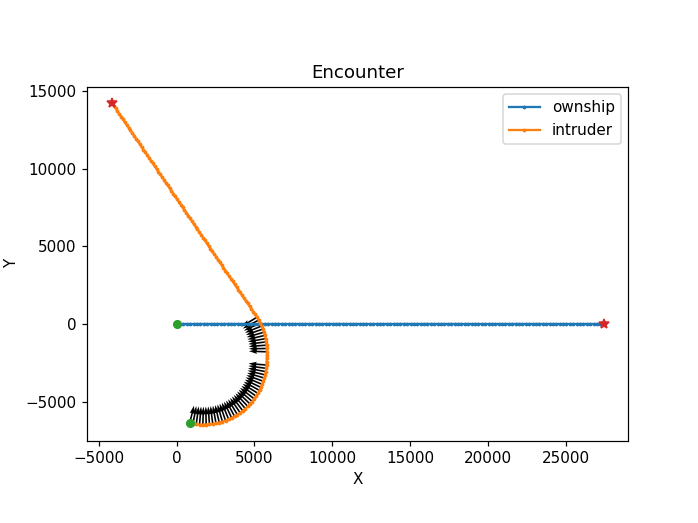

In [22]:
enc = all_encs[1]
encounter_plot(enc)